In [2]:
import pandas as pd #for reading the data
from sklearn.preprocessing import MinMaxScaler #for data standardization
from sklearn.model_selection import train_test_split #to split the data into train and test parts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #to encode the data to numerical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss, \
ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV #for cross validation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time
import numpy as np

## Data Preprocessing

#### Load the data in pandas data frame

In [5]:
data_raw = pd.read_csv("social.csv", dtype = str)
data_raw.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.00,19000.00,0
1,15810944,Male,35.00,20000.00,0
2,15668575,Female,26.00,43000.00,0
3,15603246,Female,27.00,57000.00,0
4,15804002,Male,19.00,76000.00,0


#### Explore the data 

In [8]:
#Explore the distribution of the two classes. 
#The two classes are slightly unbalanced, with the not-purchased class being around 0.65 of all targets. 
#Such inbalance is to be expected, in reality most of the people looking at an online add will not buy the product.
#In fact churn rates of 1 to 5% are most common. 
# Here 0 means no purchase
#      1 means purchased
data_raw['Purchased'].value_counts(normalize = True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

In [11]:
#Explore the data types
#all the columns are of type object. This will not be ideal for the plotting at the end of the assignments. 
#That's why we need to cast them to numerical values.
print(data_raw.dtypes)

User ID            object
Gender             object
Age                object
EstimatedSalary    object
Purchased          object
dtype: object


In [13]:
#Before the data type transformation, we decide to drop the User ID and Gender column from our data,
# as they will likely not contribute to our decision
data = data_raw.drop(['User ID', 'Gender'], axis = 1)

In [15]:
data

,Age,EstimatedSalary,Purchased
0,19.00,19000.00,0
1,35.00,20000.00,0
2,26.00,43000.00,0
3,27.00,57000.00,0
4,19.00,76000.00,0
...,...,...,...
395,46.00,41000.00,1
396,51.00,23000.00,1
397,50.00,20000.00,1
398,36.00,33000.00,0


In [17]:
#Cast remaining data columns to floats or int
data["Age"] = data["Age"].astype(float)
data["EstimatedSalary"] = data["EstimatedSalary"].astype(float)
data["Purchased"] = data["Purchased"].astype(int)

In [19]:
#check to see if we've worked correctly
print(data.dtypes)

Age                float64
EstimatedSalary    float64
Purchased            int32
dtype: object


In [21]:
#Check for missing values. There are none. This means we can proceed.
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Split the data into targets and inputs

In [24]:
target = data['Purchased']
inputs = data.drop(['Purchased'],axis=1)

### Split the data into train and test sets

In [27]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=365, stratify = target)

In [29]:
#check the result of the stratification
pd.Series(y_train).value_counts(normalize = True)

Purchased
0    0.642857
1    0.357143
Name: proportion, dtype: float64

In [31]:
#Rescale the features to [-1, 1] for the support vector classification
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_rescaled = scaling.transform(x_train)

### Classification with a linear SVM

In [34]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(x_train_rescaled, y_train) #train the svm

SVC(kernel='linear')

In [36]:
y_pred_test = svc.predict(scaling.transform(x_test)) #predict on test data

### Analyze the results of the SVM

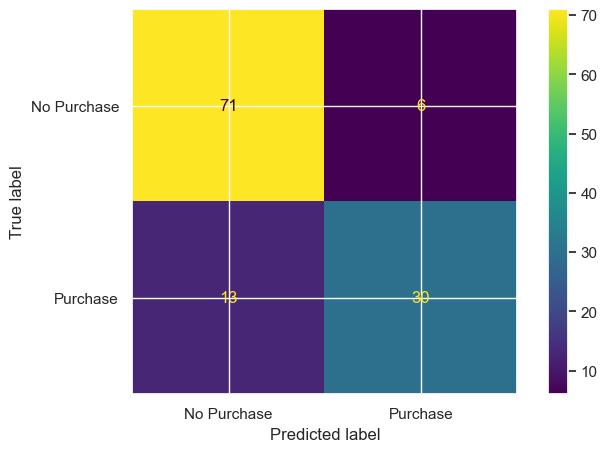

In [39]:
#Analyze the results of the classifier first with the help of a confusion matrix
#The purchased class is larger by default,
#therefore, it is not surprising that there are more correctly assigned "no purchase" or class 0 instances.
#However, with a rate of almost two and half more correct values in the TP of class 0, it is clear,
#that this class is being recognised better from the classifer.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels=["No Purchase", "Purchase"],
)

cmp.plot(ax=ax);

In [54]:
#The classification report of the linear classifer.
#From the report we can see that the recall of the "purchase" class or class 0 is the lowest score, only 0.7.
#On the other hand the recall for the 0 class is 0.92, which is a great result
print(classification_report(y_test, y_pred_test, target_names = ["Not Purchased", "Purchased"]))

               precision    recall  f1-score   support

Not Purchased       0.85      0.92      0.88        77
    Purchased       0.83      0.70      0.76        43

     accuracy                           0.84       120
    macro avg       0.84      0.81      0.82       120
 weighted avg       0.84      0.84      0.84       120



## Ploting decision boundaries

In [55]:
knn_palette = sns.color_palette([ '#29757A', '#FF5050'])
knn_palette

[(0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

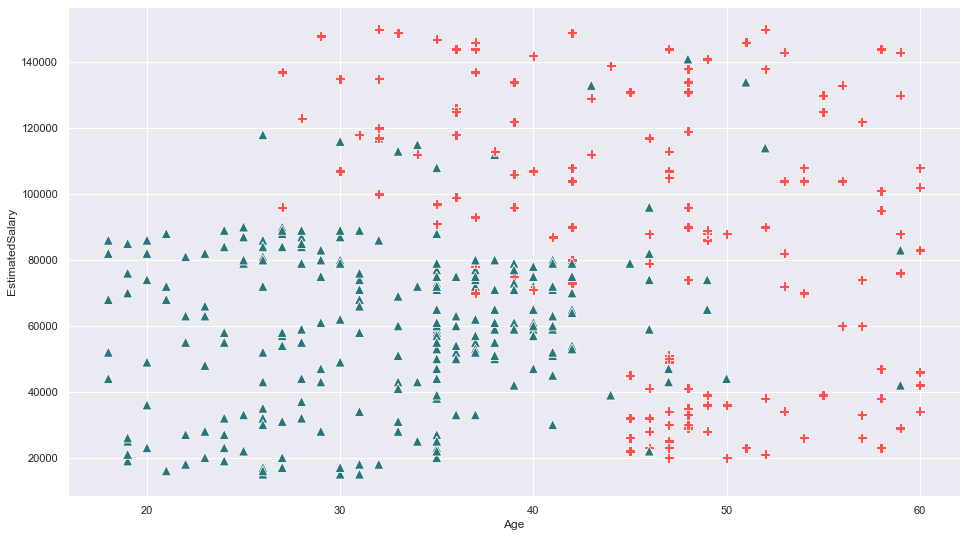

In [56]:
%matplotlib inline

# Set the size of the figure
plt.figure(figsize = (16, 9))

# Create a scatter plot.
# On the x-axis, we have the first feature.
# The y-axis we have placed the second feature.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'markers' parameter determines the shape of the points.
# The 'style' parameter connects markers to classes.
# The 's' parameter specifies the size of the points.
# The 'alpha' parameter controls the opacity of the datapoints.
# We have decided to set the 'legend' parameter equal to False as we will make no use of it in this example.
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', 
                data = data, 
                hue = 'Purchased', 
                palette = knn_palette,
                markers = ['^', 'P'],
                style = 'Purchased', 
                s = 100, 
                alpha = 1,
                legend = False);

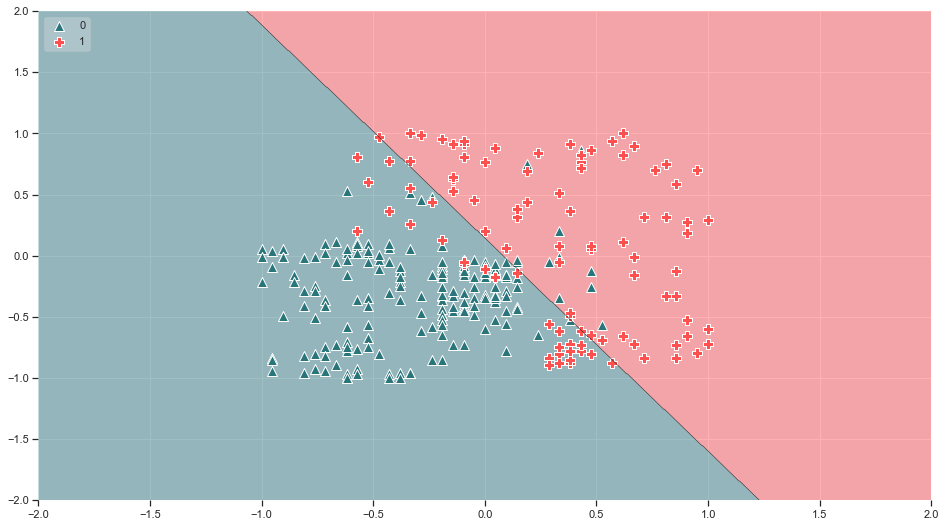

In [57]:
# plot the decision regions

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_rescaled, y = y_train.to_numpy(), #cast the y_train variable to a numpy array
                      clf = svc,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()

### Polynomial kernel

In [58]:
svc_poly = svm.SVC(kernel='poly', C=10)
svc_poly.fit(x_train_rescaled, y_train)

SVC(C=10, kernel='poly')

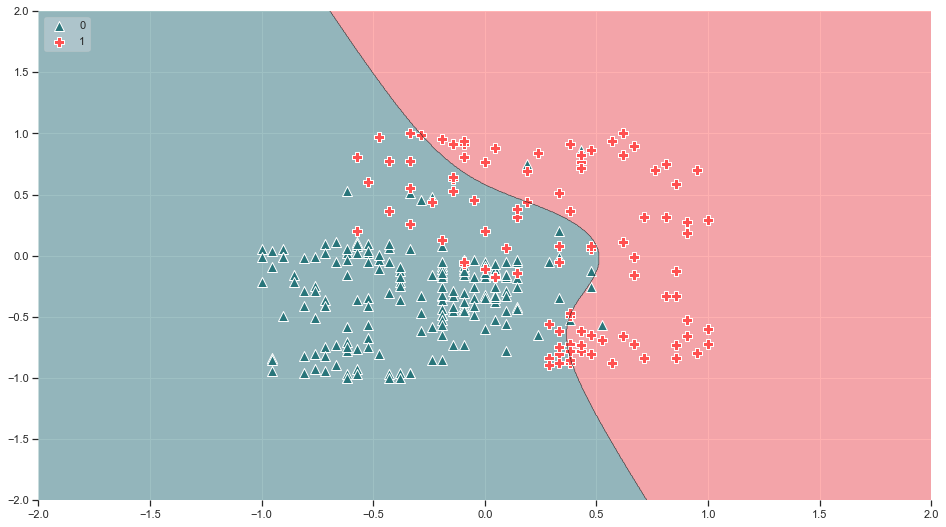

In [59]:
# plot the decision regions

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_rescaled, y = y_train.to_numpy(),
                      clf = svc_poly,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()

In [64]:
svc_sigmoid = svm.SVC(kernel='sigmoid', C=10)
svc_sigmoid.fit(x_train_rescaled, y_train)

SVC(C=10, kernel='sigmoid')

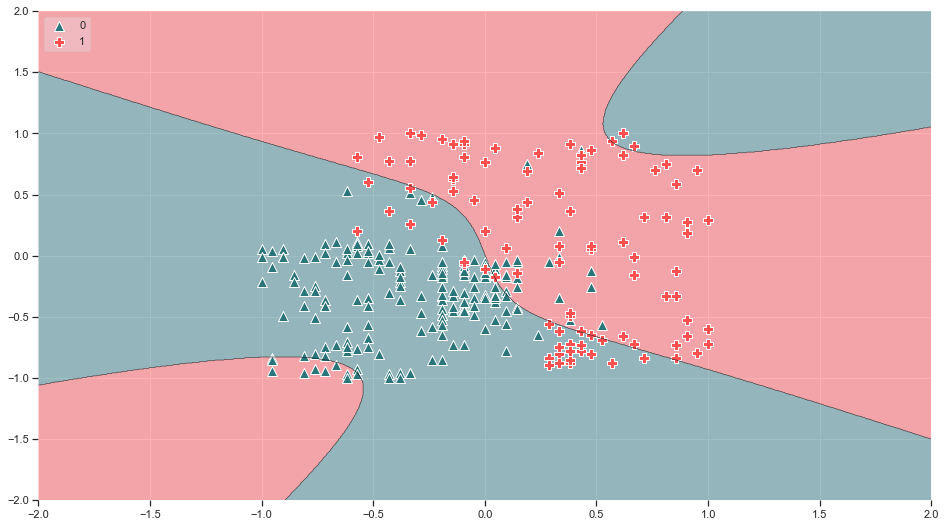

In [65]:
# plot the decision regions

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_rescaled, y = y_train.to_numpy(),
                      clf = svc_sigmoid,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()

In [60]:
svc_radial = svm.SVC(kernel='rbf', C=10)
svc_radial.fit(x_train_rescaled, y_train)

SVC(C=10)

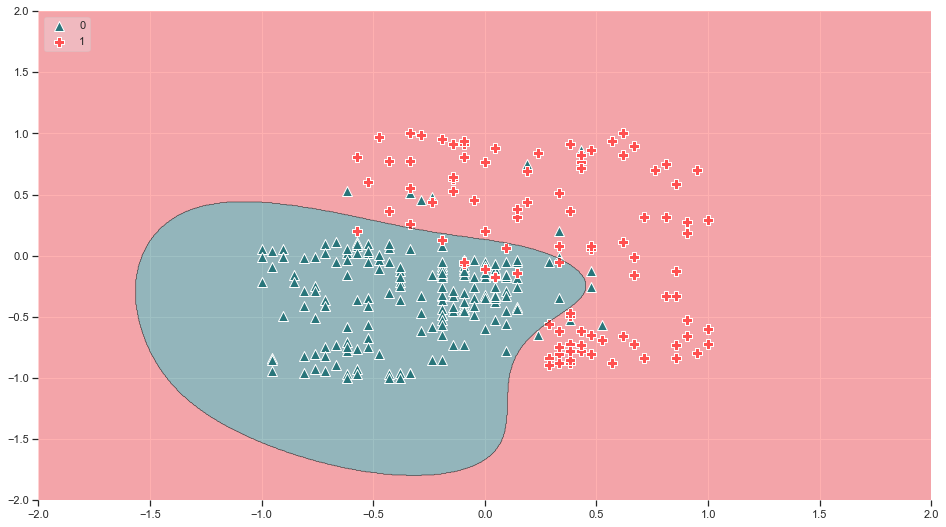

In [61]:
# plot the decision regions

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_rescaled, y = y_train.to_numpy(),
                      clf = svc_radial,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()